In [3]:
#importing libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from pandas import Series,DataFrame

In [4]:
car_df = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
car_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
car_df.loc[:,'wheelbase':'enginesize']

,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize
0,88.6,168.8,64.1,48.8,2548,dohc,four,130
1,88.6,168.8,64.1,48.8,2548,dohc,four,130
2,94.5,171.2,65.5,52.4,2823,ohcv,six,152
3,99.8,176.6,66.2,54.3,2337,ohc,four,109
4,99.4,176.6,66.4,54.3,2824,ohc,five,136
...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,ohc,four,141
201,109.1,188.8,68.8,55.5,3049,ohc,four,141
202,109.1,188.8,68.9,55.5,3012,ohcv,six,173
203,109.1,188.8,68.9,55.5,3217,ohc,six,145


In [ ]:
car_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car_df.select_dtypes(include=['int64','float64'])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
car_df.price

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [18]:

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.facecolor'] = '#000000'

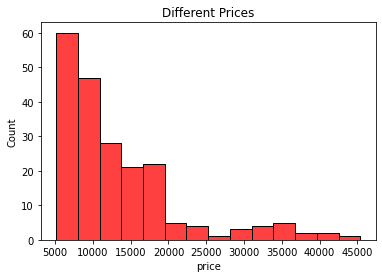

In [ ]:
plt.title("Different Prices")
sns.histplot(data = car_df,x = 'price',color = 'red')

In [ ]:
fig = px.scatter(car_df,x = 'enginesize',y = 'price',color = 'fueltype',title = 'EngineSize Vs Price')
fig.update_traces(marker_size = 5)
fig.show()

In [ ]:
px.histogram(car_df,x = 'fueltype',color = 'carbody',title = 'Fuel Types in different types of Cars')

In [11]:
#Important Columns
df = car_df[['car_ID','symboling','fueltype','carbody','enginesize','horsepower','wheelbase','price']]

In [ ]:
df.head()

,car_ID,symboling,fueltype,carbody,enginesize,horsepower,wheelbase,price
0,1,3,gas,convertible,130,111,88.6,13495.0
1,2,3,gas,convertible,130,111,88.6,16500.0
2,3,1,gas,hatchback,152,154,94.5,16500.0
3,4,2,gas,sedan,109,102,99.8,13950.0
4,5,2,gas,sedan,136,115,99.4,17450.0


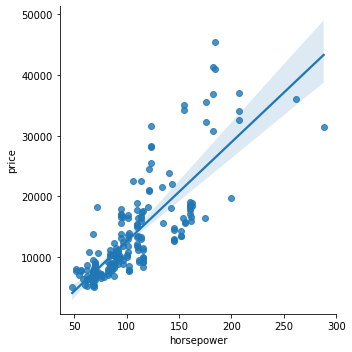

In [ ]:
sns.lmplot(data = df,x = 'horsepower',y = 'price')

In [ ]:
fig = px.histogram(df,x = 'horsepower',color = 'fueltype',title = 'Horsepower')
fig.update_layout(bargap = 0.5)
fig.show()

Text(0.5, 1.0, 'Correlation Matrix')

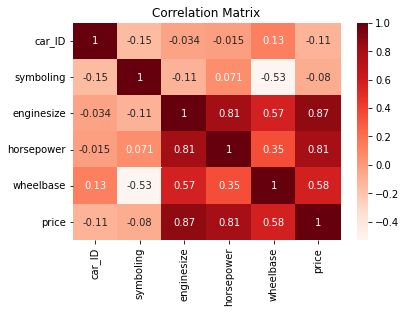

In [ ]:
#Correlation
sns.heatmap(df.corr(),annot= True,cmap = 'Reds')
plt.title('Correlation Matrix')

In [ ]:
#Linear Regression

In [9]:
def estimate_price(horsepower,w = 50,b = 100):
  return horsepower*w + b

In [ ]:
estimate_price(horsepower = 100)

5100

In [30]:
hp = df.horsepower
target = df.price

In [14]:
prediction = estimate_price(hp)

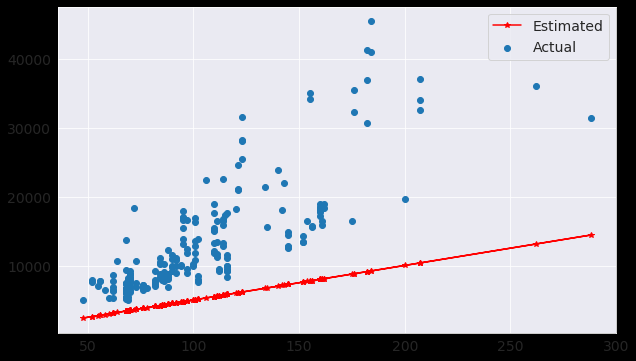

In [19]:
plt.scatter(x = hp,y = df.price)
plt.plot(hp, prediction,color = 'red',marker = '*' )
plt.xlabel = 'Horsepower'
plt.ylabel = 'Price'
plt.legend(['Estimated','Actual'])

In [31]:
def try_parameters(w,b):
  hp = df.horsepower
  target = df.price

  estimated_prices = estimate_price(hp,w,b)
  plt.figure(figsize = (12,6))
  plt.plot(hp,estimated_prices,color = 'r')
  plt.scatter(hp,target,alpha = 0.8)
  plt.xlabel('Horsepower')
  plt.ylabel('Price')
  plt.legend(['Estimated','Actual'])

TypeError: ignored

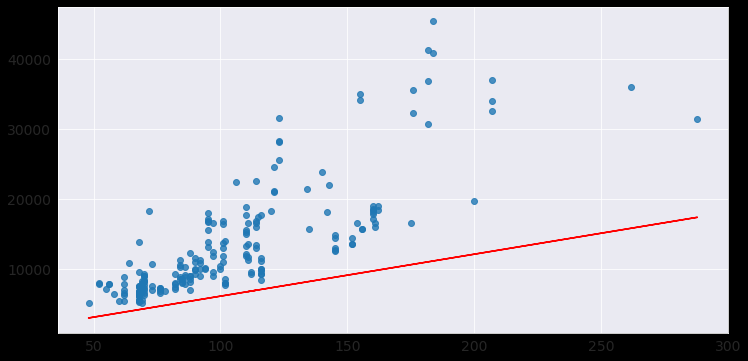

In [32]:
try_parameters(60,100)

In [24]:
#Root Mean Square Method
def rmse(target,predictions):
  return np.sqrt(np.mean(np.square(target - predictions)))

In [25]:
w = 50
b = 100

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline
def try_parameters(w,b):
  hp = df.horsepower
  target = df.price

  estimated_prices = estimate_price(hp,w,b)
  plt.figure(figsize = (12,6))
  plt.plot(hp,estimated_prices,color = 'r')
  plt.scatter(hp,target,alpha = 0.8)
  plt.xlabel("Horsepower")
  plt.ylabel("Price")
  plt.legend(["Estimated","Actual"])

  loss = rmse(target,estimated_prices)
  print("Loss: ",loss)

TypeError: ignored

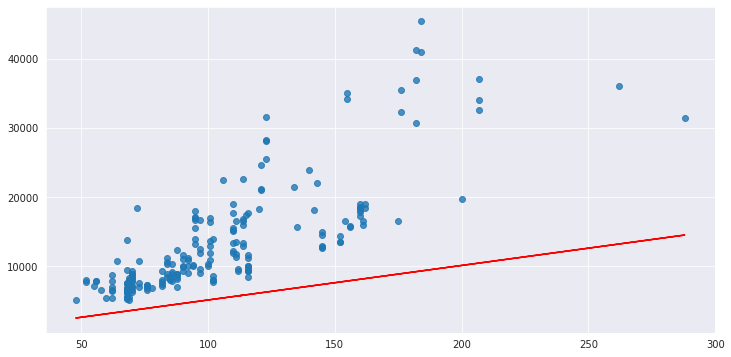

In [76]:
try_parameters(50,100)

In [49]:
#Linear Regression with a single Variable

In [35]:
import sklearn

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [78]:
input,target = df[['horsepower']],df.price

In [79]:
model.fit(input,target)

LinearRegression()

In [80]:
predictions = model.predict(input)

In [81]:
#w
model.coef_

array([163.26306097])

In [82]:
#b
model.intercept_

-3721.7614943227636

TypeError: ignored

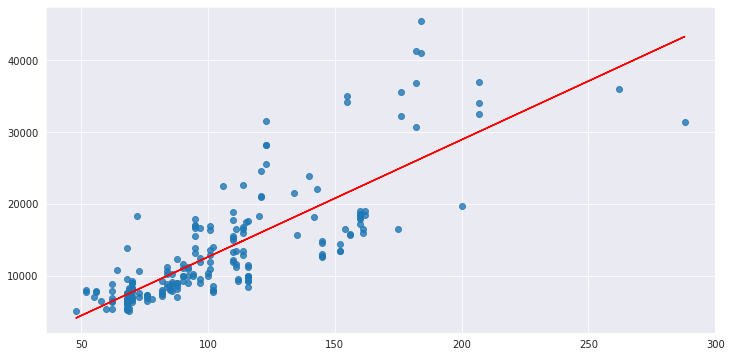

In [83]:
try_parameters(model.coef_,model.intercept_)

In [48]:
#Linear Regression with multiple Variables

In [50]:
df.head()

,car_ID,symboling,fueltype,carbody,enginesize,horsepower,wheelbase,price
0,1,3,gas,convertible,130,111,88.6,13495.0
1,2,3,gas,convertible,130,111,88.6,16500.0
2,3,1,gas,hatchback,152,154,94.5,16500.0
3,4,2,gas,sedan,109,102,99.8,13950.0
4,5,2,gas,sedan,136,115,99.4,17450.0


In [52]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [53]:
fuels = {'gas':0,'diesel':1}
df['fuel_code'] = df['fueltype'].map(fuels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
df.head()

,car_ID,symboling,fueltype,carbody,enginesize,horsepower,wheelbase,price,fuel_code
0,1,3,gas,convertible,130,111,88.6,13495.0,0
1,2,3,gas,convertible,130,111,88.6,16500.0,0
2,3,1,gas,hatchback,152,154,94.5,16500.0,0
3,4,2,gas,sedan,109,102,99.8,13950.0,0
4,5,2,gas,sedan,136,115,99.4,17450.0,0


In [55]:
inputs = df[['horsepower','fuel_code']]
target = df.price

In [60]:
model = LinearRegression()

In [58]:
inputs.shape

(205, 2)

In [59]:
target.shape

(205,)

In [61]:
model.fit(inputs,target)

LinearRegression()

In [63]:
predictions = model.predict(inputs)

In [64]:
model.coef_

array([ 171.36780172, 6573.01198684])

In [65]:
model.intercept_

-5206.872841692806

In [68]:
#3dgraph
fig = px.scatter_3d(df,x = 'horsepower',y = 'enginesize',z = 'price')
fig.update_traces(marker_size = 3,marker_opacity = 0.5)
fig.show()

In [69]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [70]:
#one hot encoding

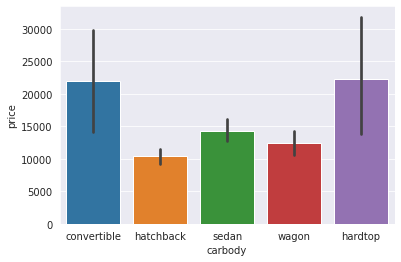

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.barplot(data = df,x = 'carbody',y = 'price')

In [86]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(df[['carbody']])
enc.categories_

[array(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'],
       dtype=object)]

In [87]:
one_hot = enc.transform(df[['carbody']]).toarray()
one_hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [88]:
df[['convertible','hardtop','hatchback','sedan','wagon']] = one_hot

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
df.head()

,car_ID,symboling,fueltype,carbody,enginesize,horsepower,wheelbase,price,fuel_code,convertible,hardtop,hatchback,sedan,wagon
0,1,3,gas,convertible,130,111,88.6,13495.0,0,1.0,0.0,0.0,0.0,0.0
1,2,3,gas,convertible,130,111,88.6,16500.0,0,1.0,0.0,0.0,0.0,0.0
2,3,1,gas,hatchback,152,154,94.5,16500.0,0,0.0,0.0,1.0,0.0,0.0
3,4,2,gas,sedan,109,102,99.8,13950.0,0,0.0,0.0,0.0,1.0,0.0
4,5,2,gas,sedan,136,115,99.4,17450.0,0,0.0,0.0,0.0,1.0,0.0


In [92]:
input_cols = ['horsepower','enginesize','fuel_code','wheelbase','convertible','hardtop','hatchback','sedan','wagon']

In [93]:
inputs , targets = df[input_cols],df['price']

In [95]:
model = LinearRegression().fit(inputs,targets)

In [96]:
predictions = model.predict(inputs)

In [97]:
loss = rmse(targets,predictions)
print("Loss: ",loss)

Loss:  3181.4804258465974


In [98]:
model.coef_

array([   83.44008006,    72.53250842,  2166.88772928,   269.83971605,
        4646.70656124,   861.53902552, -2016.78621119, -1081.13759204,
       -2410.32178353])

In [99]:
model.intercept_

-30156.31802193917

In [101]:
weights_df = pd.DataFrame({
    'feature':np.append(input_cols,1),
    'weights':np.append(model.coef_,model.intercept_)
})

In [102]:
weights_df

,feature,weights
0,horsepower,83.440080
1,enginesize,72.532508
2,fuel_code,2166.887729
3,wheelbase,269.839716
4,convertible,4646.706561
5,hardtop,861.539026
6,hatchback,-2016.786211
7,sedan,-1081.137592
8,wagon,-2410.321784
9,1,-30156.318022


In [103]:
#Standardization 

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
numeric_cols = ['horsepower','enginesize','wheelbase']
scaler = StandardScaler()
scaler.fit(df[numeric_cols])

StandardScaler()

In [106]:
scaler.mean_

array([104.11707317, 126.90731707,  98.75658537])

In [107]:
scaler.var_

array([1556.11312314, 1725.65482451,   36.08489566])

In [108]:
scaled_inputs = scaler.transform(df[numeric_cols])
scaled_inputs

array([[ 0.17448278,  0.07444893, -1.6907718 ],
       [ 0.17448278,  0.07444893, -1.6907718 ],
       [ 1.26453643,  0.60404617, -0.70859588],
       [-0.05366798, -0.43107572,  0.17369775],
       [ 0.27588312,  0.21888454,  0.10710955],
       [ 0.14913269,  0.21888454,  0.17369775],
       [ 0.14913269,  0.21888454,  1.17252073],
       [ 0.14913269,  0.21888454,  1.17252073],
       [ 0.90963524,  0.09852153,  1.17252073],
       [ 1.41663694,  0.09852153,  0.1237566 ],
       [-0.07901807, -0.45514832,  0.40675645],
       [-0.07901807, -0.45514832,  0.40675645],
       [ 0.42798363,  0.89291739,  0.40675645],
       [ 0.42798363,  0.89291739,  0.40675645],
       [ 0.42798363,  0.89291739,  0.78963859],
       [ 1.9743388 ,  1.97618448,  0.78963859],
       [ 1.9743388 ,  1.97618448,  0.78963859],
       [ 1.9743388 ,  1.97618448,  1.87169681],
       [-1.42257257, -1.58656061, -1.7240659 ],
       [-0.8648707 , -0.88845515, -0.70859588],
       [-0.8648707 , -0.88845515, -0.708

In [109]:
cat_cols = ['fuel_code','convertible','hatchback','wagon','hardtop','sedan']
categorical_data = df[cat_cols].values

In [110]:
inputs = np.concatenate((scaled_inputs,categorical_data),axis = 1)

In [111]:
targets = df['price']

In [112]:
predictions = model.predict(inputs)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [113]:
loss = rmse(targets,predictions)
print("Loss: ",loss)

Loss:  44933.818695032925


In [114]:
weights_df = pd.DataFrame({
    'feature' : np.append(numeric_cols + cat_cols,1),
    'weight' : np.append(model.coef_,model.intercept_)
})
weights_df.sort_values('weight',ascending = False)

,feature,weight
4,convertible,4646.706561
2,wheelbase,2166.887729
5,hatchback,861.539026
3,fuel_code,269.839716
0,horsepower,83.440080
1,enginesize,72.532508
7,hardtop,-1081.137592
6,wagon,-2016.786211
8,sedan,-2410.321784
9,1,-30156.318022


In [115]:
#Training and Testing

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
inputs_train,inputs_test,targets_train,targets_test = train_test_split(inputs,targets,test_size = 0.1)

In [118]:
model = LinearRegression().fit(inputs_train,targets_train)

In [119]:
predictions = model.predict(inputs_test)

In [120]:
loss = rmse(targets_test,predictions)
print("Loss: ",loss)

Loss:  3297.764708084656
